# Data Science 1 HW

# Task a) Loading
Obtain the dataset with the function `load_iris()` from the package `sklearn.datasets`. Combine the values of the properties `data`, `feature names`, `target`, and `target names` from the loaded object into one `pandas.DataFrame`. Name the target column `species`. View the resulting `DataFrame`.

In [40]:
from sklearn.datasets import load_iris
import pandas as pd

ds = load_iris()
df = pd.DataFrame(data= ds["data"], columns=ds["feature_names"])
target_names = [ds.target_names[x] for x in ds.target]
df['species'] = target_names
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Task b) Descriptive Statistics
Compute descriptive statistics like mean, standard deviation etc. for the numeric features of the dataset. You may call methods to compute individual statistics like `mean()` as well as a summary with `describe()`, both applicable to the whole `DataFrame` as well as single columns.
To summarize the target variable, count how often each `species` occurs.

In [37]:
# Calculate mean
df.iloc[:, 0:4].mean(axis=0)

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

In [38]:
# Calculate median
df.iloc[:, 0:4].median(axis=0)

sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64

In [39]:
# Calculate standard deviation
df.iloc[:, 0:4].std(axis=0)

sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64

In [48]:
# Count occurences
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [51]:
percentiles = [0.2, 0.4, 0.6, 0.8]
included_types = ['float', 'object', 'int']
df.describe(percentiles=percentiles, include=included_types)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
20%,5.000000,2.700000,1.500000,0.200000,NaN
40%,5.600000,3.000000,3.900000,1.160000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN


# Task c) Distribution plots
Choose at least one of the features and create a histogram as well as a boxplot with the package `matplotlib.pyplot`, `seaborn`, or using the `plot()` method of `DataFrame`. Try changing the number of buckets used in the histogram.

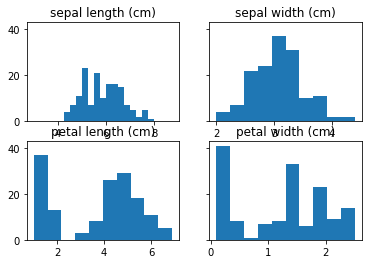

In [89]:
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(2, 2, sharey=True)
axs[0, 0].hist(df.iloc[:, 0], bins=np.arange(3, 9, 0.25))
axs[0, 0].title.set_text(df.columns[0])
axs[0, 1].hist(df.iloc[:, 1])
axs[0, 1].title.set_text(df.columns[1])
axs[1, 0].hist(df.iloc[:, 2])
axs[1, 0].title.set_text(df.columns[2])
axs[1, 1].hist(df.iloc[:, 3])
axs[1, 1].title.set_text(df.columns[3])

# Histograms

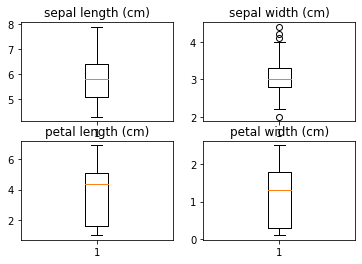

In [92]:
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(2, 2)
axs[0, 0].boxplot(df.iloc[:, 0])
axs[0, 0].title.set_text(df.columns[0])
axs[0, 1].boxplot(df.iloc[:, 1])
axs[0, 1].title.set_text(df.columns[1])
axs[1, 0].boxplot(df.iloc[:, 2])
axs[1, 0].title.set_text(df.columns[2])
axs[1, 1].boxplot(df.iloc[:, 3])
axs[1, 1].title.set_text(df.columns[3])

# Boxplots

# Task d) Scatter plots
Create a scatter plot with one feature on one axis and another feature on the other axis. Color the data points according to `species`.

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

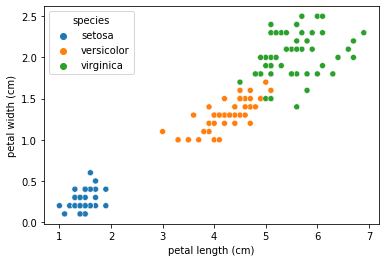

In [95]:
import seaborn

seaborn.scatterplot(x=df['petal length (cm)'], y=df['petal width (cm)'], hue=df['species'])

# Task e) Grouped Boxplots
Use `seaborn` to create a boxplot of one numeric feature, having a separate box for each `species`. Repeat this procedure for each feature.

<AxesSubplot:xlabel='species', ylabel='petal width (cm)'>

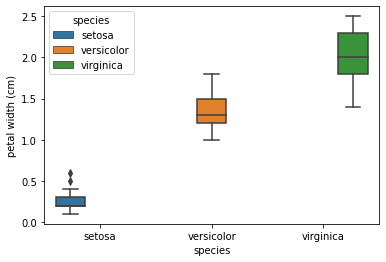

In [107]:
import seaborn
seaborn.boxplot(x='species', y=df.columns[0], data=df, hue='species')

<AxesSubplot:xlabel='species', ylabel='sepal width (cm)'>

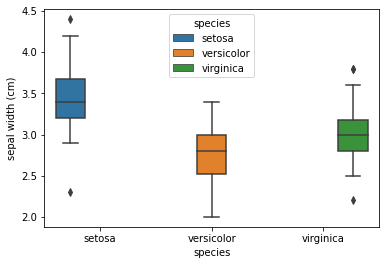

In [108]:
import seaborn
seaborn.boxplot(x='species', y=df.columns[1], data=df, hue='species')

<AxesSubplot:xlabel='species', ylabel='petal length (cm)'>

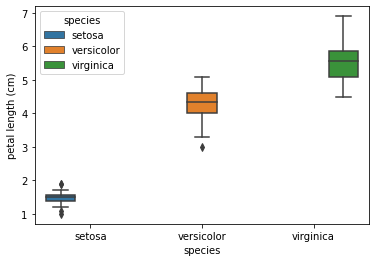

In [109]:
import seaborn
seaborn.boxplot(x='species', y=df.columns[2], data=df, hue='species')

<AxesSubplot:xlabel='species', ylabel='petal width (cm)'>

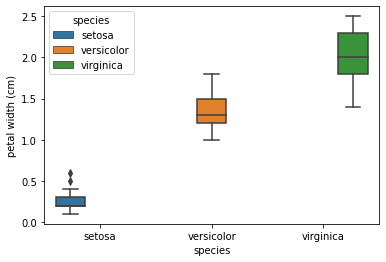

In [110]:
import seaborn
seaborn.boxplot(x='species', y=df.columns[3], data=df, hue='species')

# Task e) χ2 Test
Conduct χ2 tests to examine the relationship between each of the numeric features and the target species. You may use chi2_contingency() from scipy.stats for the tests. As preparation, you may use crosstab() from pandas to create contingency tables and cut() from pandas to discretize features.
How do you interpret the results? What is the relationship between the results of the statistical tests and the plots from the previous sub-task?